## 인구 천명당 범죄발생건수(시도)

https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DI2%26tblId%3DDT_1YL3001%26orgId%3D101%26utm_source%3Dchatgpt.com%26

In [45]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator 
from adjustText import adjust_text

# 윈도우: 맑은 고딕 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [19]:
#숫자 단위: 인구 천명당 범죄 발생 건수 
crime_df = pd.read_csv('data/crime_csv.csv')

# 필요한 컬럼만 남기기 (시도명 + 연도별 '천명당 범죄발생건수' 컬럼)
crime_rate = crime_df[['행정구역별','2021','2022','2023']]

# 0행(설명행) 삭제 → 실제 데이터만 남기기
crime_rate = crime_rate.drop([0,1])
crime_rate = crime_rate.reset_index(drop=True)
crime_rate

,행정구역별,2021,2022,2023
0,서울특별시,27.1,29.6,29.5
1,부산광역시,30,31.7,32.3
2,대구광역시,28.5,28.3,28.1
3,인천광역시,26,27.8,29.3
4,광주광역시,27.3,27.2,29.6
5,대전광역시,27.5,30.2,30
6,울산광역시,25.9,24.6,27.1
7,세종특별자치시,16,17.1,19.7
8,경기도,26.3,26.8,27.7
9,강원특별자치도,25.7,27.1,28.3


In [ ]:
# 지역별 개인 소득 데이터를 년도에 맞게 정돈하여, 
# 두개의 데이터셋의 크기를 통일하였습니다 .
money_df = pd.read_csv('data/personal_income_2021_2023.csv')
money_df = money_df.drop(0)
money_df = money_df.reset_index(drop=True)

money_df

,시도별,2021,2022,2023
0,서울특별시,59498,63778,65994
1,부산광역시,32832,34263,35373
2,대구광역시,31558,34000,34344
3,인천광역시,37828,39748,41203
4,광주광역시,34787,36826,38019
5,대전광역시,36934,39378,40976
6,울산광역시,57151,56854,60576
7,세종특별자치시,45005,46146,47220
8,경기도,44754,47144,47899
9,강원특별자치도,33317,35422,37509


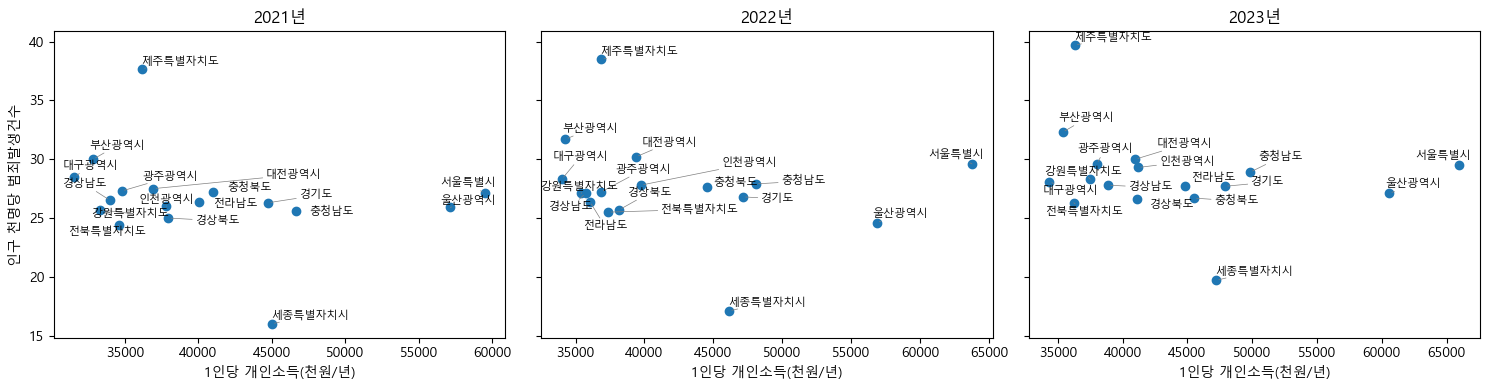

In [47]:
# 년도별로 3개의 그래프를 그렸습니다. 
# x축: 개인 소득
# y축: 인구 천명당 범죄 발생 건수

years = ['2021', '2022', '2023']
crime_rate[years] = crime_rate[years].astype(float)
money_df[years]   = money_df[years].astype(float)
names = money_df['시도별']

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, year in zip(axes, years):
    x = money_df[year]
    y = crime_rate[year]

    ax.scatter(x, y)

    # 점 라벨들 모아서 한 번에 조정
    texts = []
    for xi, yi, label in zip(x, y, names):
        t = ax.text(xi, yi, label,
                    fontsize=8,
                    ha='center', va='bottom')
        texts.append(t)

    # ★ 자동으로 겹치지 않게 위치 조정
    adjust_text(texts, ax=ax,
                arrowprops=dict(arrowstyle='-', lw=0.5, color='gray'))

    ax.set_title(f'{year}년')
    ax.set_xlabel('1인당 개인소득(천원/년)')

axes[0].set_ylabel('인구 천명당 범죄발생건수')
plt.tight_layout()
plt.show()

### 소득과 범죄발생 건수의 관계

 세 해(2021~2023) 모두 점들이 거의 가로로 퍼져 있는 모양이에요.
→ x축(소득)이 늘어나도 y축(범죄발생)이 뚜렷하게 같이 늘거나 줄어들지 않음

즉, “1인당 개인소득이 높다고 해서 범죄가 확 늘거나, 낮다고 해서 확 줄어든다”는 패턴은 거의 안 보인다고 볼 수 있습니다.
상관관계가 있다고 해도 상당히 약할 것 같은 모양

### 시사점
“지역 간 범죄율 차이를 설명할 때,
단순히 ‘소득 수준’ 하나만으로는 설명력이 크지 않다.”
→ 인구밀도, 유동인구, 관광객, 연령구성, 치안 인력 같은 다른 변수들이 같이 필요해 보임.
“3년 연속 비슷한 패턴이라는 건
단기 충격보다 장기적인 도시 구조·인구 특성이 중요할 수 있다.”

In [ ]:
#상관계수 약한편
for year in years:
    print(year, np.corrcoef(money_df[year], crime_rate[year])[0,1])

2021 -0.24536717264242824
2022 -0.20566941110035067
2023 -0.24769327993633924
